============================================================
🍕 Ingredient Freshness Analysis for Bella Italia Pizzas
============================================================

📌 **Author:** José Acosta  
📆 **Date:** July 2024  
📑 **Title:** Statistical Comparison between Bella Italia and Pizza Express  
📝 **Description:**  
Analysis of ingredient storage times to evaluate freshness as a competitive advantage.

============================================================


# Fresh Ingredients Analysis Project for Bella Italia Pizzas

## Problem Description
Bella Italia Pizzas wishes to highlight the **freshness of its ingredients** as a competitive advantage over its main competitor, Pizza Express. To do so, we will conduct a comparative statistical analysis of ingredient storage times. Our research question is:

**Are the ingredients at Bella Italia Pizzas fresher than those at Pizza Express?**

Answering this question will highlight Bella Italia Pizzas as an option that prioritizes the freshness and quality of its ingredients in its pizzas.

## Study Objectives
1. **Collect simulated data** on the storage times of key ingredients (vegetables, meats, and cheeses) at both pizzerias.
2. **Calculate statistical measures** (means, standard deviations) to compare ingredient storage times.
3. **Visualize the differences** between both pizzerias using box plots to assess and communicate ingredient freshness.

## Code Structure
1. **Simulated Data Generation**: Fictitious data on storage times in days will be generated for 50 days of operation, differentiating between Pizzas Bella Italia and Pizza Express.
2. **Statistical Analysis**: We will calculate the mean and standard deviation of storage times by ingredient type for both pizzerias.
3. **Visualization**: We will create box plots to graphically represent the differences in ingredient freshness.

---


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style settings for charts
sns.set(style="whitegrid")

# 1. Generating Simulated Data
np.random.seed(42) # For reproducibility

# Define ingredient categories and pizzerias
ingredients = ['Vegetables', 'Meats', 'Cheeses']
pizzerias = ['Bella Italia', 'Pizza Express']
operating_days = 50

# Generating storage times (in days)
# Bella Italia pizzas: lower storage times (indicating fresher ingredients)
bella_italia_data = {ingredient: np.random.normal(loc=2, scale=0.5, size=operating_days) for ingredient in ingredients}
pizza_express_data = {ingredient: np.random.normal(loc=3, scale=0.7, size=operating_days) for ingredient in ingredients}

# Create DataFrames
bella_italia_df = pd.DataFrame(bella_italia_data)
bella_italia_df['Pizzeria'] = 'Bella Italia'

pizza_express_df = pd.DataFrame(pizza_express_data)
pizza_express_df['Pizzeria'] = 'Pizza Express'

# Combine the data into a single DataFrame
data = pd.concat([bella_italia_df, pizza_express_df], ignore_index=True)

# 2. Statistical Analysis
# Calculate mean and standard deviation of storage times by pizzeria and ingredients
statistical_summary = data.groupby('Pizzeria').agg(['mean', 'std'])

In [14]:
print(data.head())

   Vegetables     Meats   Cheeses      Pizzeria
0    2.248357  2.162042  1.292315  Bella Italia
1    1.930868  1.807459  1.789677  Bella Italia
2    2.323844  1.661539  1.828643  Bella Italia
3    2.761515  2.305838  1.598861  Bella Italia
4    1.882923  2.515500  1.919357  Bella Italia


FRESHNESS ANALYSIS - INGREDIENT STORAGE COMPARISON

This visualization compares ingredient freshness across three pizzerias
by analyzing storage time distributions through boxplots.

Key insights to look for:
• Lower median values indicate fresher ingredients
• Smaller box ranges show more consistent storage practices
• Outliers may indicate quality control issues
• Compare quartile ranges between pizzerias for each ingredient

Interpretation guide:
- Box bottom: 25th percentile (Q1)
- Box middle line: Median (Q2)
- Box top: 75th percentile (Q3)
- Whiskers: Data range (excluding outliers)
- Dots: Outliers (values beyond 1.5 × IQR)



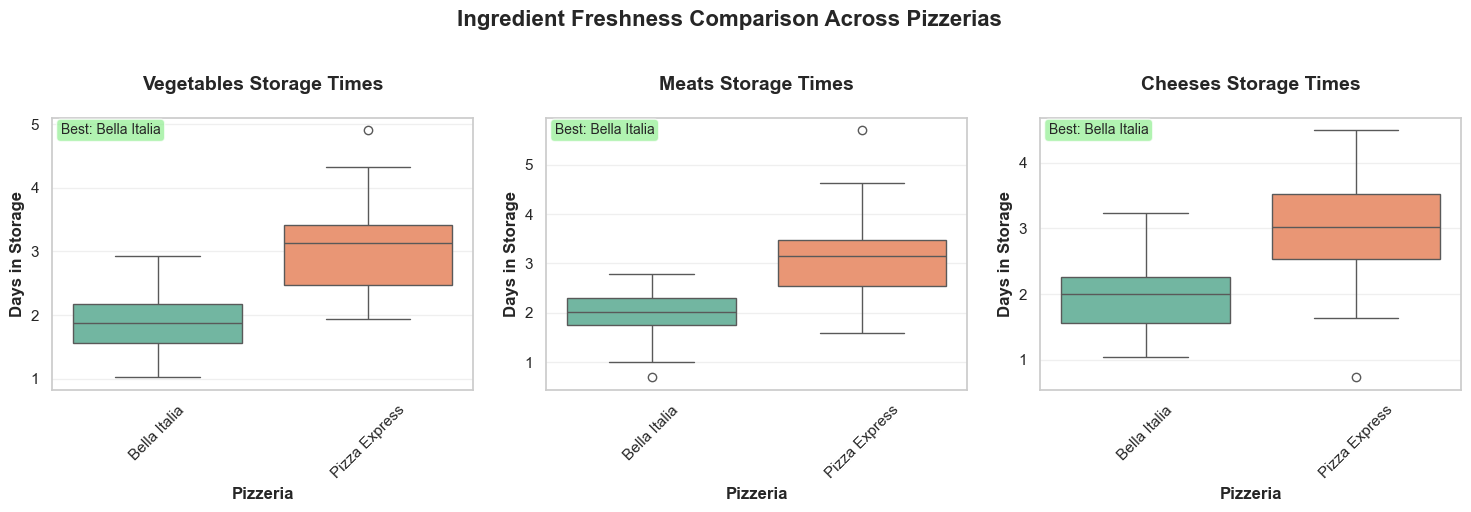


SUMMARY INSIGHTS

VEGETABLES ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (1.88 days)
• Worst performing pizzeria (highest median): Pizza Express (3.14 days)
• Most consistent storage: Bella Italia (std: 0.47)
• Least consistent storage: Pizza Express (std: 0.63)

MEATS ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (2.02 days)
• Worst performing pizzeria (highest median): Pizza Express (3.14 days)
• Most consistent storage: Bella Italia (std: 0.44)
• Least consistent storage: Pizza Express (std: 0.76)

CHEESES ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (2.01 days)
• Worst performing pizzeria (highest median): Pizza Express (3.03 days)
• Most consistent storage: Bella Italia (std: 0.51)
• Least consistent storage: Pizza Express (std: 0.76)

RECOMMENDATIONS

Based on this analysis, consider:
1. Investigate best practices from top

In [26]:
# 3. Data Visualization
print("="*60)
print("FRESHNESS ANALYSIS - INGREDIENT STORAGE COMPARISON")
print("="*60)
print("""
This visualization compares ingredient freshness across three pizzerias
by analyzing storage time distributions through boxplots.

Key insights to look for:
• Lower median values indicate fresher ingredients
• Smaller box ranges show more consistent storage practices
• Outliers may indicate quality control issues
• Compare quartile ranges between pizzerias for each ingredient

Interpretation guide:
- Box bottom: 25th percentile (Q1)
- Box middle line: Median (Q2)
- Box top: 75th percentile (Q3)
- Whiskers: Data range (excluding outliers)
- Dots: Outliers (values beyond 1.5 × IQR)
""")

# Create the visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Add main title for the entire figure
fig.suptitle('Ingredient Freshness Comparison Across Pizzerias', 
             fontsize=16, fontweight='bold', y=1.02)

for i, ingredient in enumerate(ingredients):
    sns.boxplot(data=data, x='Pizzeria', y=ingredient, ax=axes[i], 
                hue='Pizzeria', palette='Set2', legend=False)
    
    # Enhance individual subplot titles
    axes[i].set_title(f"{ingredient.title()} Storage Times", 
                     fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel('Pizzeria', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Days in Storage', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add grid for better readability
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add statistical annotation
    median_values = data.groupby('Pizzeria')[ingredient].median()
    best_pizzeria = median_values.idxmin()
    axes[i].text(0.02, 0.98, f'Best: {best_pizzeria}', 
                transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7),
                verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

# Post-visualization summary
print("\n" + "="*60)
print("SUMMARY INSIGHTS")
print("="*60)

for ingredient in ingredients:
    print(f"\n{ingredient.upper()} ANALYSIS:")
    print("-" * 30)
    
    # Calculate key statistics
    stats = data.groupby('Pizzeria')[ingredient].agg(['median', 'mean', 'std']).round(2)
    best_median = stats['median'].idxmin()
    worst_median = stats['median'].idxmax()
    
    print(f"• Best performing pizzeria (lowest median): {best_median} ({stats.loc[best_median, 'median']} days)")
    print(f"• Worst performing pizzeria (highest median): {worst_median} ({stats.loc[worst_median, 'median']} days)")
    print(f"• Most consistent storage: {stats['std'].idxmin()} (std: {stats['std'].min():.2f})")
    print(f"• Least consistent storage: {stats['std'].idxmax()} (std: {stats['std'].max():.2f})")

print(f"\n{'='*60}")
print("RECOMMENDATIONS")
print("="*60)
print("""
Based on this analysis, consider:
1. Investigate best practices from top-performing pizzerias
2. Address consistency issues in locations with high variation
3. Implement quality control measures for outlier management
4. Monitor storage conditions and supplier relationships
5. Consider ingredient rotation policies for better freshness
""")

FRESHNESS ANALYSIS - INGREDIENT STORAGE COMPARISON

This visualization compares ingredient freshness across three pizzerias
by analyzing storage time distributions through boxplots.

Key insights to look for:
• Lower median values indicate fresher ingredients
• Smaller box ranges show more consistent storage practices
• Outliers may indicate quality control issues
• Compare quartile ranges between pizzerias for each ingredient

Interpretation guide:
- Box bottom: 25th percentile (Q1)
- Box middle line: Median (Q2)
- Box top: 75th percentile (Q3)
- Whiskers: Data range (excluding outliers)
- Dots: Outliers (values beyond 1.5 × IQR)



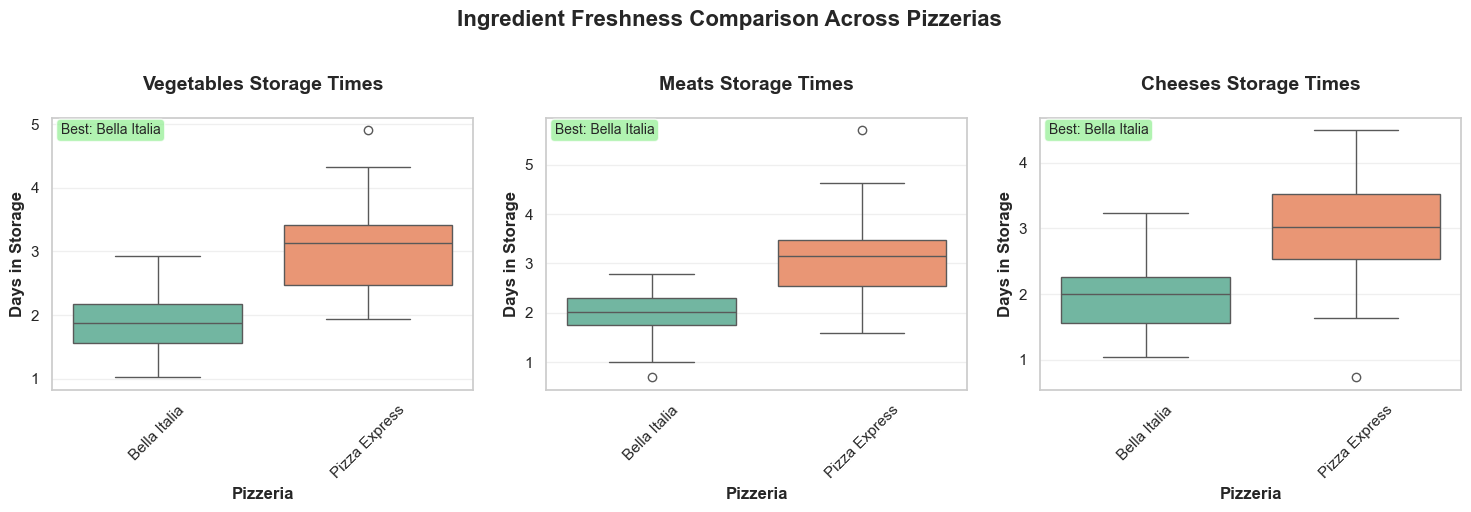


SUMMARY INSIGHTS

VEGETABLES ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (1.88 days)
• Worst performing pizzeria (highest median): Pizza Express (3.14 days)
• Most consistent storage: Bella Italia (std: 0.47)
• Least consistent storage: Pizza Express (std: 0.63)

MEATS ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (2.02 days)
• Worst performing pizzeria (highest median): Pizza Express (3.14 days)
• Most consistent storage: Bella Italia (std: 0.44)
• Least consistent storage: Pizza Express (std: 0.76)

CHEESES ANALYSIS:
------------------------------
• Best performing pizzeria (lowest median): Bella Italia (2.01 days)
• Worst performing pizzeria (highest median): Pizza Express (3.03 days)
• Most consistent storage: Bella Italia (std: 0.51)
• Least consistent storage: Pizza Express (std: 0.76)

RECOMMENDATIONS

Based on this analysis, consider:
1. Investigate best practices from top

In [25]:
# 3. Data Visualization
print("="*60)
print("FRESHNESS ANALYSIS - INGREDIENT STORAGE COMPARISON")
print("="*60)
print("""
This visualization compares ingredient freshness across three pizzerias
by analyzing storage time distributions through boxplots.

Key insights to look for:
• Lower median values indicate fresher ingredients
• Smaller box ranges show more consistent storage practices
• Outliers may indicate quality control issues
• Compare quartile ranges between pizzerias for each ingredient

Interpretation guide:
- Box bottom: 25th percentile (Q1)
- Box middle line: Median (Q2)
- Box top: 75th percentile (Q3)
- Whiskers: Data range (excluding outliers)
- Dots: Outliers (values beyond 1.5 × IQR)
""")

# Create the visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Add main title for the entire figure
fig.suptitle('Ingredient Freshness Comparison Across Pizzerias', 
             fontsize=16, fontweight='bold', y=1.02)

for i, ingredient in enumerate(ingredients):
    sns.boxplot(data=data, x='Pizzeria', y=ingredient, ax=axes[i], 
                hue='Pizzeria', palette='Set2', legend=False)
    
    # Enhance individual subplot titles
    axes[i].set_title(f"{ingredient.title()} Storage Times", 
                     fontsize=14, fontweight='bold', pad=20)
    axes[i].set_xlabel('Pizzeria', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Days in Storage', fontsize=12, fontweight='bold')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add grid for better readability
    axes[i].grid(True, alpha=0.3, axis='y')
    
    # Add statistical annotation
    median_values = data.groupby('Pizzeria')[ingredient].median()
    best_pizzeria = median_values.idxmin()
    axes[i].text(0.02, 0.98, f'Best: {best_pizzeria}', 
                transform=axes[i].transAxes, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.7),
                verticalalignment='top', fontsize=10)

plt.tight_layout()
plt.show()

# Post-visualization summary
print("\n" + "="*60)
print("SUMMARY INSIGHTS")
print("="*60)

for ingredient in ingredients:
    print(f"\n{ingredient.upper()} ANALYSIS:")
    print("-" * 30)
    
    # Calculate key statistics
    stats = data.groupby('Pizzeria')[ingredient].agg(['median', 'mean', 'std']).round(2)
    best_median = stats['median'].idxmin()
    worst_median = stats['median'].idxmax()
    
    print(f"• Best performing pizzeria (lowest median): {best_median} ({stats.loc[best_median, 'median']} days)")
    print(f"• Worst performing pizzeria (highest median): {worst_median} ({stats.loc[worst_median, 'median']} days)")
    print(f"• Most consistent storage: {stats['std'].idxmin()} (std: {stats['std'].min():.2f})")
    print(f"• Least consistent storage: {stats['std'].idxmax()} (std: {stats['std'].max():.2f})")

print(f"\n{'='*60}")
print("RECOMMENDATIONS")
print("="*60)
print("""
Based on this analysis, consider:
1. Investigate best practices from top-performing pizzerias
2. Address consistency issues in locations with high variation
3. Implement quality control measures for outlier management
4. Monitor storage conditions and supplier relationships
5. Consider ingredient rotation policies for better freshness
""")


Below are three box plots comparing the storage times of different ingredients (vegetables, meats, cheeses) between Bella Italia and Pizza Express pizzerias.

1. Freshness Comparison - Vegetables
Median: The line inside each box represents the median storage time.

Bella Italia has a lower median (around 2 days) compared to Pizza Express (around 3 days), suggesting that vegetables at Bella Italia are stored for a shorter time, indicating greater freshness.
Interquartile Range (Box): The height of the box shows the dispersion of the data between the first and third quartiles (50% of the data).

Bella Italia's box is more compact, suggesting less variability in storage time, while Pizza Express has a taller box, indicating greater variation in storage times.
Outliers: Points outside the "whiskers" are outliers.

Pizza Express shows an outlier in storage times, indicating that in some cases vegetables are stored much longer than usual.
2. Freshness Comparison - Meats
Median: Bella Italia has a median storage time for meats of around 2 days, while Pizza Express is closer to 3 days.

This suggests that Bella Italia stores its meats for less time than Pizza Express, indicating greater freshness.
Interquartile Range: Bella Italia's box is again more compact, suggesting less variability in meat storage times.

Pizza Express's box is wider, showing that the pizzeria has greater variation in meat storage times.
Outliers: There are outliers in both cases, indicating that, in some cases, meat storage times may be unusually long or short at both pizzerias.

3. Freshness Comparison - Cheeses
Median: Bella Italia has a median of around 2 days, while Pizza Express has a higher median, close to 3.5 days.

This indicates that the cheeses at Bella Italia are, on average, fresher compared to those at Pizza Express.
Interquartile Range: The Bella Italia box is more compact, showing less variability in cheese storage.

The Pizza Express box is wider, indicating greater dispersion in cheese storage times.
Outliers: Pizza Express has an outlier in storage time, which could indicate exceptionally short storage in some cases.

Overall Conclusion
Overall, the boxplots show that:

Bella Italia has shorter storage times for each ingredient, indicating potentially fresher ingredients.
Pizza Express shows greater variability in storage times and has longer median storage times compared to Bella Italia.
These graphics support the claim that Bella Italia uses fresher ingredients compared to its competitor, which is a strength that could be highlighted in its marketing campaigns.